Importing module

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import t as t_func
from scipy.stats import norm
from scipy.stats import kurtosis

%matplotlib inline

## Data Preprocess

Import data

In [42]:
df_raw = pd.read_csv('data\car_prices.csv', error_bad_lines=False)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [8]:
print(df_raw.shape)
df_raw.head(5)

(558811, 16)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


The data is about selling price of used cars with attribute such as model, maker, state, condition, last odometer values, etc.

<AxesSubplot:ylabel='Frequency'>

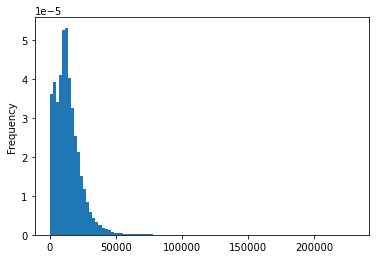

In [9]:
df_raw['sellingprice'].plot.hist(bins=100,density=True)

In [44]:
#Capitalize the text of 'body' columns
df_raw['body'] = df_raw['body'].str.upper()

## Data Summaries

### 5 Number Summaries

In [45]:
df_raw.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [18]:
df_raw.describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000000,547017.000000,558717.000000,558811.000000,558811.000000
mean,2010.038696,3.424512,68323.195797,13769.324646,13611.262461
std,3.966812,0.949439,53397.752933,9679.874607,9749.656919
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,2.700000,28374.000000,7100.000000,6900.000000
50%,2012.000000,3.600000,52256.000000,12250.000000,12100.000000
75%,2013.000000,4.200000,99112.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [46]:
df_raw.mode()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2012,Ford,Altima,Base,SEDAN,automatic,wbanv13588cz57827,fl,1.9,1.0,black,black,nissan-infiniti lt,12500,11000,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)


In [48]:
df_raw[df_raw.describe().columns].mode()

,year,condition,odometer,mmr,sellingprice
0,2012,1.9,1.0,12500,11000


From the description of 5 num. summary, we can see some of the data are not normally distributed. Because, the mean, 2nd quartile, and mode does not located on the same point.

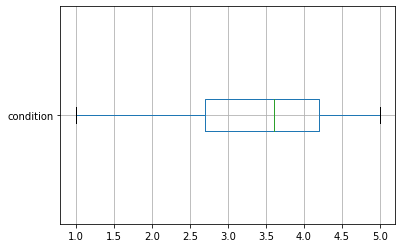

In [49]:
boxplot = df_raw.boxplot('condition',vert=False)

<AxesSubplot:xlabel='condition', ylabel='Count'>

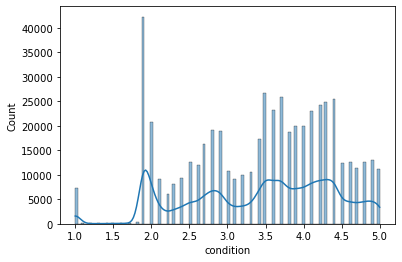

In [50]:
sns.histplot(df_raw['condition'],kde=True)

From the box plot, we can see there is not much outlier on the condition columns.

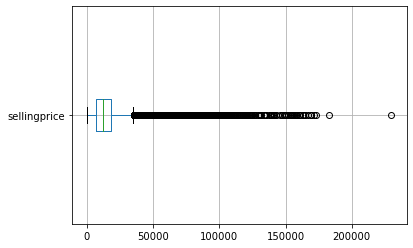

In [51]:
boxplot = df_raw.boxplot('sellingprice',vert=False)

We found outlier with prices above 200000

<AxesSubplot:xlabel='sellingprice', ylabel='Count'>

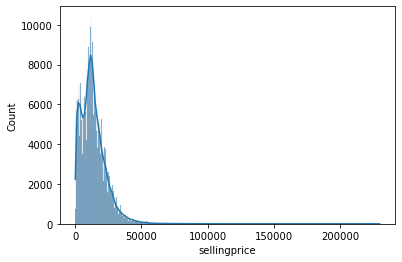

In [52]:
sns.histplot(df_raw['sellingprice'],kde=True)

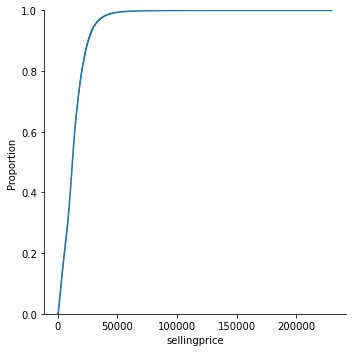

In [54]:
sns.displot(df_raw['sellingprice'], kind="ecdf")

From the box plot, kde plot, and CDF plot, the distribution of selling price is not normal.

Compared to condition, selling price data tend to be more skewed.

### Correlation

In [12]:
df_raw.corr()

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


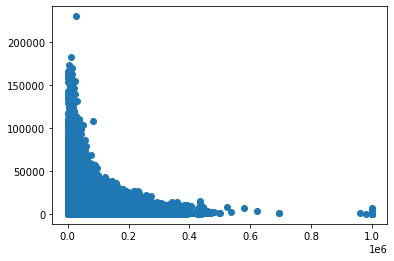

In [14]:
plt.scatter(df_raw['odometer'],df_raw['sellingprice'])

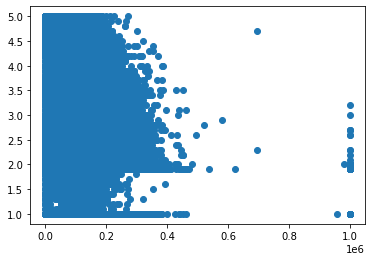

In [55]:
plt.scatter(df_raw['odometer'],df_raw['condition'])

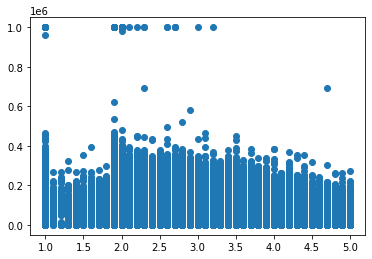

In [56]:
plt.scatter(df_raw['condition'],df_raw['odometer'])

From the correlation matrix, we can conclude:

1. Selling price have positive correlation with condition, year, mmr.
2. Selling price have negative correlation with odometer, indicating the car that has travelled more have lower selling price.

### Remove Outliers

By Price

In [61]:
sell_price=df_raw['sellingprice']

In [62]:
sell_price.quantile(0.75)+1.5*(sell_price.quantile(0.75)-sell_price.quantile(0.25))

35150.0

From Tukey's Upper bound, the number of removed outlier by selling price is too high.


Thus, we use another alternative amount to remove only the alineated outliers that shows gap between the outlier and other data point.

In [70]:
#After 175K there is a big gap before the outliers
df_filt = df_raw[df_raw['sellingprice']<=175000]

<AxesSubplot:ylabel='Frequency'>

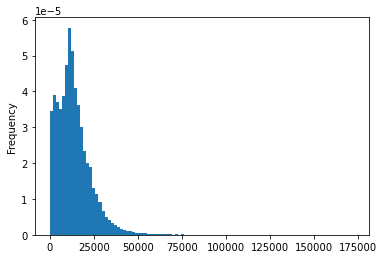

In [71]:
df_filt['sellingprice'].plot.hist(bins=100,density=True)

<AxesSubplot:>

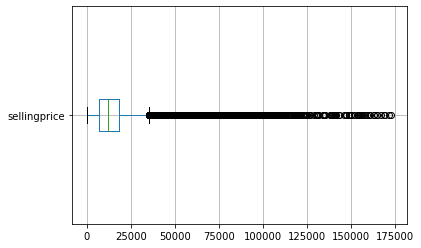

In [72]:
df_filt.boxplot('sellingprice',vert=False)

By Body

In [73]:
df_filt.groupby('body').count()

,year,make,model,trim,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
body,,,,,,,,,,,,,,,
ACCESS CAB,294,294,294,294,270,294,294,289,294,293,293,294,294,294,294
BEETLE CONVERTIBLE,59,59,59,59,53,59,59,59,59,58,58,59,59,59,59
CAB PLUS,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4
CAB PLUS 4,6,6,6,6,5,6,6,6,6,6,6,6,6,6,6
CLUB CAB,178,178,178,178,162,178,178,165,178,178,178,178,178,178,178
CONVERTIBLE,10476,10476,10476,10476,9562,10476,10476,10227,10475,10428,10428,10476,10476,10476,10476
COUPE,17751,17751,17751,17751,16389,17751,17751,17287,17748,17707,17707,17751,17751,17751,17751
CREW CAB,16394,16394,16394,16394,14614,16394,16394,16008,16392,16385,16385,16394,16394,16394,16394
CREWMAX CAB,565,565,565,565,503,565,565,550,565,565,565,565,565,565,565


In [74]:
# Group by body and count the data
df_grp_body = df_filt.groupby('body').count().reset_index()[['body','model']].sort_values('model',ascending=False)

# Get cumulative sum by each body count
df_grp_body['body_count']=df_grp_body['model'].cumsum()

# Convert cumulative sum to percentage
df_grp_body['pcg_csum']=df_grp_body['body_count']/df_grp_body['body_count'].max()

# Keep only most 95% data
df_grp_body = df_grp_body[df_grp_body['pcg_csum']<=0.95]

In [70]:
df_grp_body.head(5)

,body,model,body_count,pcg_csum
36,SEDAN,241202,241202,0.442287
39,SUV,143798,385000,0.705966
24,HATCHBACK,26237,411237,0.754076
28,MINIVAN,25529,436766,0.800888
6,COUPE,17716,454482,0.833374


In [75]:
print(df_grp_body.shape)
#df_grp_body

(10, 4)


In [76]:
df_filt = df_filt[df_filt['body'].isin(df_grp_body['body'])]

In [77]:
print(df_filt.shape)

(514152, 16)


## Measure of Central Tendency and Variance

In [109]:
df_filt.describe()

,year,condition,odometer,mmr,sellingprice
count,513988.000000,503539.000000,513914.000000,513988.000000,513988.000000
mean,2010.187666,3.444605,66472.522148,13818.343619,13656.737653
std,3.866537,0.941208,51595.362591,9518.201832,9583.838437
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28199.250000,7350.000000,7100.000000
50%,2012.000000,3.600000,50583.500000,12300.000000,12200.000000
75%,2013.000000,4.200000,96257.000000,18150.000000,18000.000000
max,2015.000000,5.000000,999999.000000,116000.000000,100000.000000


In [74]:
print(df_filt['sellingprice'].describe())
df_filt['sellingprice'].describe()['mean']

count    513988.000000
mean      13656.737653
std        9583.838437
min           1.000000
25%        7100.000000
50%       12200.000000
75%       18000.000000
max      100000.000000
Name: sellingprice, dtype: float64


13656.73765340825

Calculate variance and standard deviation for all the numeric columns

In [91]:
# Standard deviation
print("Numeric columns Standard Deviation")
print(df_filt.std())
print("")
print("Numeric columns Variance")
print(df_filt.var())
print("")
#Range
num_columns = df_filt.describe().columns
print(df_filt[num_columns].max()-df_filt[num_columns].min())

Numeric columns Standard Deviation
year                3.866301
condition           0.941269
odometer        51596.859074
mmr              9726.904186
sellingprice     9789.589389
dtype: float64

Numeric columns Variance
year            1.494829e+01
condition       8.859880e-01
odometer        2.662236e+09
mmr             9.461267e+07
sellingprice    9.583606e+07
dtype: float64

year                25.0
condition            4.0
odometer        999998.0
mmr             177975.0
sellingprice    172999.0
dtype: float64


In [93]:
df_filt['sellingprice'].mode()

0    11000
dtype: int64

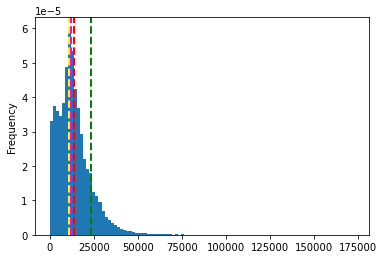

In [95]:
df_filt['sellingprice'].plot.hist(bins=100,density=True)
plt.axvline(df_filt['sellingprice'].describe()['mean'], color='red', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['sellingprice'].describe()['50%'], color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['sellingprice'].describe()['mean']+df_filt['sellingprice'].describe()['std']
            , color='green', linestyle='dashed', linewidth=2)
plt.axvline(df_filt['sellingprice'].mode()[0], color='yellow', linestyle='dashed', linewidth=2)

Distribution Fit

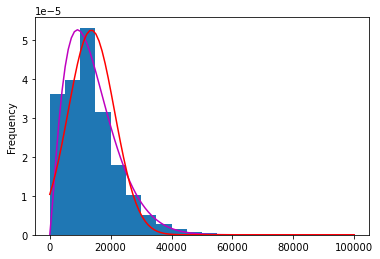

In [76]:
from scipy.stats import beta as beta_fun
fig, ax = plt.subplots(1, 1)
df_filt['sellingprice'].plot.hist(bins=20,density=True)

alpha = 2.3
beta = 14
x = np.linspace(0,1, 100)
plt.plot(100000*x, beta_fun.pdf(x,alpha,beta)/100000,'m-', lw=1.5, alpha=1, label='norm pdf')

x = np.linspace(0,100000, 100)
plt.plot(x, norm.pdf(x,df_filt['sellingprice'].describe()['mean'],df_filt['sellingprice'].describe()['std']-2000)
         ,'r-', lw=1.5, alpha=1, label='expon pdf')

In [77]:
Exp_value = alpha/(alpha+beta)*100000
print(Exp_value)

14110.429447852759


### Skewness and Kurtosis

In [96]:
df_filt.kurtosis()

year             1.072042
condition       -0.760453
odometer        14.167498
mmr             11.866219
sellingprice    11.105255
dtype: float64

We can expect a more uniform distribution in year and condition due to its low kurtosis

(array([3.94759e+05, 1.09931e+05, 8.91000e+03, 3.87000e+02, 2.30000e+01,
        3.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 6.20000e+01]),
 array([1.000000e+00, 1.000008e+05, 2.000006e+05, 3.000004e+05,
        4.000002e+05, 5.000000e+05, 5.999998e+05, 6.999996e+05,
        7.999994e+05, 8.999992e+05, 9.999990e+05]),
 <BarContainer object of 10 artists>)

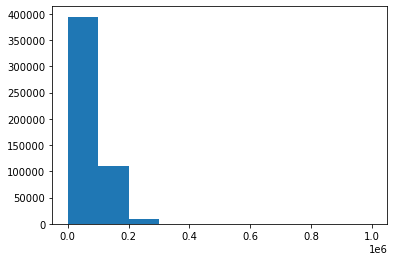

In [99]:
plt.hist(df_filt['odometer'])

(array([ 6673.,   605., 63679., 32513., 60323., 53567., 88279., 59387.,
        81949., 56727.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

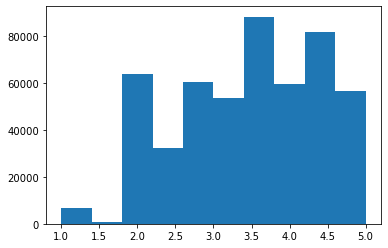

In [97]:
plt.hist(df_filt['condition'])

In [100]:
df_filt.skew()

year           -1.222460
condition      -0.379447
odometer        1.860044
mmr             2.065352
sellingprice    2.003323
dtype: float64

In [101]:
df_filt['sellingprice'].skew()

2.0033230693626134

In [102]:
np.log(df_filt['sellingprice']).kurtosis()

1.966637972124218

In [103]:
np.log10(df_filt['sellingprice']).skew()

-1.234321401885297

(array([3.74384e+05, 1.23111e+05, 1.37240e+04, 1.98500e+03, 6.37000e+02,
        1.65000e+02, 7.10000e+01, 3.10000e+01, 2.70000e+01, 1.70000e+01]),
 array([1.000000e+00, 1.730090e+04, 3.460080e+04, 5.190070e+04,
        6.920060e+04, 8.650050e+04, 1.038004e+05, 1.211003e+05,
        1.384002e+05, 1.557001e+05, 1.730000e+05]),
 <BarContainer object of 10 artists>)

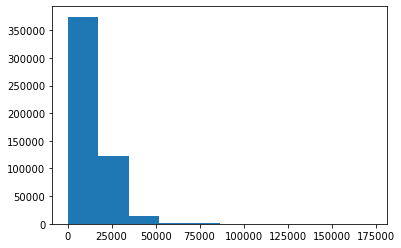

In [105]:
plt.hist(df_filt['sellingprice'])

(array([3.00000e+00, 0.00000e+00, 0.00000e+00, 1.60000e+01, 4.08500e+03,
        1.76000e+04, 6.44220e+04, 2.55424e+05, 1.69658e+05, 2.94400e+03]),
 array([0.        , 0.52380461, 1.04760922, 1.57141383, 2.09521844,
        2.61902305, 3.14282766, 3.66663227, 4.19043688, 4.71424149,
        5.2380461 ]),
 <BarContainer object of 10 artists>)

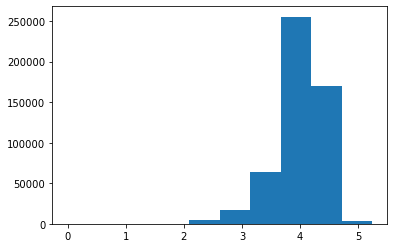

In [104]:
plt.hist(np.log10(df_filt['sellingprice']))

## Chi Square Test

Melihat hubungan antar kategori.

Inspect relationship between car company and its selled car body type.
- H0: No relationship between car company (make) and car body type
- H1: Exists a relationship between car company (make) and car body type

In [107]:
df_pivot=df_filt.groupby(['make','body']).count()[['model','sellingprice']].reset_index()

In [108]:
df_pivot.head(5)

,make,body,model,sellingprice
0,Acura,COUPE,97,97
1,Acura,HATCHBACK,218,218
2,Acura,SEDAN,3545,3545
3,Acura,SUV,2005,2005
4,Aston Martin,CONVERTIBLE,11,11


In [109]:
df_pivot = df_pivot.pivot(index="make",columns="body", values='model').fillna(0)

In [111]:
df_pivot.head(5)

body,CONVERTIBLE,COUPE,CREW CAB,G SEDAN,HATCHBACK,MINIVAN,SEDAN,SUPERCREW,SUV,WAGON
make,,,,,,,,,,
Acura,0.0,97.0,0.0,0.0,218.0,0.0,3545.0,0.0,2005.0,0.0
Aston Martin,11.0,12.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Audi,420.0,477.0,0.0,0.0,22.0,0.0,3498.0,0.0,1030.0,410.0
BMW,2199.0,1984.0,0.0,0.0,283.0,0.0,11616.0,0.0,4379.0,172.0
Bentley,34.0,47.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0


In [112]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 757431.24
p-value: 0.0000


Ada hubungan antara maker dengan model mobil yang mereka buat

In [113]:
df_pivot=df_filt.groupby(['transmission','body']).count()[['model','sellingprice']].reset_index()
df_pivot

,transmission,body,model,sellingprice
0,automatic,CONVERTIBLE,8442,8442
1,automatic,COUPE,13247,13247
2,automatic,CREW CAB,14507,14507
3,automatic,G SEDAN,6902,6902
4,automatic,HATCHBACK,20974,20974
5,automatic,MINIVAN,22445,22445
6,automatic,SEDAN,209940,210032
7,automatic,SUPERCREW,7707,7707
8,automatic,SUV,121962,121962
9,automatic,WAGON,13743,13743


In [114]:
df_pivot=df_filt.groupby(['transmission','body']).count()[['model','sellingprice']].reset_index()
df_pivot = df_pivot.pivot(index="transmission",columns="body", values='model').fillna(0)
df_pivot.head(5)

body,CONVERTIBLE,COUPE,CREW CAB,G SEDAN,HATCHBACK,MINIVAN,SEDAN,SUPERCREW,SUV,WAGON
transmission,,,,,,,,,,
automatic,8442,13247,14507,6902,20974,22445,209940,7707,121962,13743
manual,1120,3142,107,42,3268,11,5350,1,1797,872


In [115]:
chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
print(f'Observed chi2: {chisq:.2f}')
print(f'p-value: {pvalue:.4f}')

Observed chi2: 25363.86
p-value: 0.0000


In [116]:
cols = [['transmission','body'],['make','body'],['make','state']]
p_vals=[]

for col in cols:
    df_pivot=df_filt.groupby(col).count()[['model','sellingprice']].reset_index()
    df_pivot = df_pivot.pivot(index=col[0],columns=col[1], values='model').fillna(0)
    chisq, pvalue, df, expected = stats.chi2_contingency(df_pivot)
    p_vals.append(pvalue)

In [117]:
p_vals

[0.0, 0.0, 0.0]

## Two sample Test

Whether car company effect selling price

Particularly, Chevrolet and Nissan
$$ H_0: \mu_{Chev} = \mu_{Nis} $$
$$ H_1: \mu_{Chev} \neq \mu_{Nis} $$

In [118]:
df_make_smy=df_filt.groupby('make').agg({'sellingprice':['count','mean']}).reset_index()
df_make_smy.columns = df_make_smy.columns.droplevel()

In [119]:
df_make_smy.sort_values('count',ascending=False).head(5)

,,count,mean
14,Ford,81291,14728.863687
7,Chevrolet,54298,12067.943331
36,Nissan,53272,11756.020987
49,Toyota,37406,11681.540608
10,Dodge,27278,11407.521959


In [120]:
df_chev = df_filt[df_filt['make']=='Chevrolet']
df_niss = df_filt[df_filt['make']=='Nissan']

C:\Users\madin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

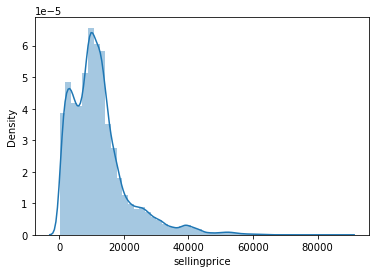

In [121]:
sns.distplot(df_chev['sellingprice'])

C:\Users\madin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sellingprice', ylabel='Density'>

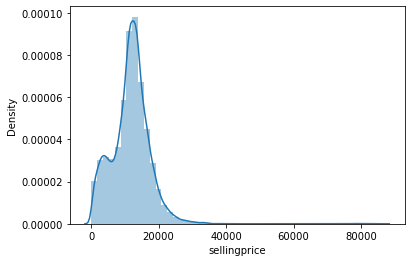

In [122]:
sns.distplot(df_niss['sellingprice'])

Chevrolet sample mean:12067.943331246086
Chevrolet sample std:9031.041723068338
Chevrolet Kurtosis:4.295113167965582
Nissan sample mean:11756.02098663463
t-statistic:-6.777551844101266
p-value:0.000000


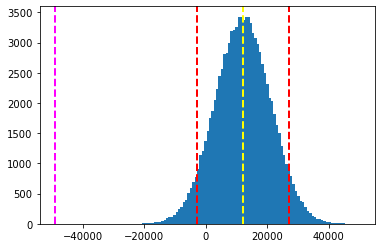

In [123]:
np.random.seed(123)
nonMath =df_chev['sellingprice']
math = df_niss['sellingprice']
print("Chevrolet sample mean:" + str(nonMath.mean()))
print("Chevrolet sample std:" + str(nonMath.std()))
print("Chevrolet Kurtosis:" + str(nonMath.kurtosis()))
print("Nissan sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath,equal_var=False)
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)

#2-tailed
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

pop = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() +  t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()